# Classical methods
In this script we evaluate the "classical" SVM method for the MNIST database of handwritten digits. It's also meant to become familiar with the 4 dimensional data format used for the deep learning libraries later on.


## Loading the data
While the original dataset has 70'000 examples of hand written digits, we restrict us here to the first 4000 digits to make an interactive session possible. This is especially necessarry for the for deep learning part we do later.  

### Data-Format
For the deep learning libraries we will use later all images must be provided in a 4-dimensional array X with the following dimensions: 

(number of images, number of colors, x, y) 

and the labels in a vector y of same size. So X[1,0,1,2] would be the image number 1, the color channel 0 and the pixel x = 1 and y=2.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as imgplot

import cPickle as pickle
import gzip
with gzip.open('mnist_4000.pkl.gz', 'rb') as f:
    (X,y) = pickle.load(f)
PIXELS = len(X[0,0,0,:])
X.shape, y.shape, PIXELS

((4000, 1, 28, 28), (4000,), 28)

## Task 1 (Understanding the geometry)
Print out the pixel (15,16) of the 1th image and the 0th color channel. 

In [2]:
# YOUR CODE HERE
X[1,0,15,16] 

-1.1617744

## Task 2 (plotting)
Plot the 0th image and print out the digit/label stored in the variable *y*. Plotting of a 2-dimnesional matrix XX can be done with 

```
import matplotlib.pyplot as plt
plt.imshow(XX, interpolation='none',cmap=plt.get_cmap('gray'))
```

5


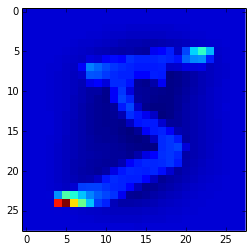

In [3]:
# YOUR CODE HERE
print(y[0])
import matplotlib.pyplot as plt
plt.imshow(X[0,0,:,:], interpolation='none')

## Task 3 (Reshaping)
For classification using traditional method, the data must be in a two dimensional array. The rows are the examples and the columns the features. Use `X.reshape((#Number of Rows, #Number of features))` to do the simple unrolling feature extraction. 

In [4]:
# Your code here
X2d = X.reshape((4000, PIXELS**2))
np.shape(X2d)

(4000, 784)

## Task 4 (Classification using a SVM)

Use the first 3000 images to train a svm with a linear kernel and parameter C=0.01. Then make predictions on the remaining 1000 images and evalutate the performance (i.e. the percentage of correctly classified images). You may need the following command:

```
from sklearn import svm
svc = svm.SVC(kernel='linear', C=...).fit(...)
y_pred = svc.predict(...)
np.mean(... == y_pred)
```

In [5]:
# Your code here
X_train = X2d[0:3000,:]
X_test = X2d[3000:,]
y_train = y[0:3000]
y_test = y[3000:]

In [6]:
from sklearn import svm
svc = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)

In [7]:
y_pred = svc.predict(X_test)

In [8]:
np.mean(y_test == y_pred)

0.92200000000000004

# Below, just if there is time
## Optimization of the hyperparameters

In [9]:
# Just for complettness to see which is the best value for C
for C in (1e-3, 1e-2, 1e-1, 1, 1e1,1e2):
    svc = svm.SVC(kernel='linear', C=C).fit(X_train,y_train)
    print('C={0} number of SV={1}'.format(C, len(svc.support_vectors_)))
    y_pred = svc.predict(X_test)
    print(np.mean(y_test == y_pred))

C=0.001 number of SV=1661
0.916
C=0.01 number of SV=1240
0.922
C=0.1 number of SV=1215
0.908
C=1 number of SV=1215
0.908
C=10.0 number of SV=1215
0.908
C=100.0 number of SV=1215
0.908


## Task 5 (Dimension Reduction, optional)
Use a PCA as dimensionreduction, before doing the classification and limit to the first 50 components. Does the result get better? Is the calculation faster? You may need the following command:

```
from sklearn.decomposition import RandomizedPCA
pca = RandomizedPCA(..., whiten=True).fit(X_train) #To "learn the PCA"
X_test_pca = pca.transform(X_test) #To apply the PCA
```


In [10]:
## Your code, Task 5 PCA before classification
from sklearn.decomposition import RandomizedPCA
pca = RandomizedPCA(n_components=50, whiten=True).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [11]:
svc = svm.SVC(kernel='linear', C=0.01).fit(X_train_pca,y_train)
y_pred = svc.predict(X_test_pca)
np.mean(y_test == y_pred)

0.91600000000000004

### Just for completness

In [12]:
for C in (1e-3, 1e-2, 1e-1, 1, 1e1,1e2):
    svc = svm.SVC(kernel='linear', C=C).fit(X_train_pca,y_train)
    print('C={0} number of SV={1}'.format(C, len(svc.support_vectors_)))
    y_pred = svc.predict(X_test_pca)
    print(np.mean(y_test == y_pred))

C=0.001 number of SV=2777
0.856
C=0.01 number of SV=1720
0.916
C=0.1 number of SV=1073
0.917
C=1 number of SV=914
0.914
C=10.0 number of SV=865
0.894
C=100.0 number of SV=851
0.884


### Task 5 Conclusion

A support vector machine (with a linear kernel) can usually deal with many features and the accuracy does not deterioriate. However, the performance (in time) is faster if we do a dimension reduction before the classification. If we would have done for example a kNN classification instead of the SVM we could expect that the accurancy would get better, when using dimension reduction before classification.